# White Blood Cell Classification Using Convolutional Neural Network

In [3]:
#Blood cell subtype classification
#import pandas as pd
import cv2 as cv # allows you to perform image processing and computer vision tasks
import numpy as np # used for working with arrays
import matplotlib.pyplot as plt # used to create 2D graphs and plots by using python scripts
import os #  provides the facility to establish the interaction between the user and the operating system
import seaborn as sns # Seaborn is the extended version of Matplotlib


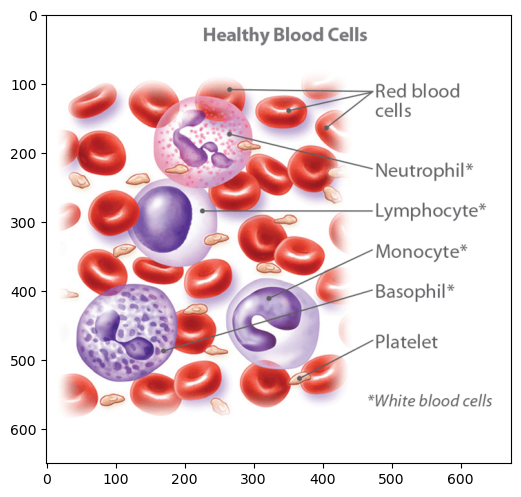

In [4]:
Blood_cell = cv.imread("C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/IMAGES/Healthy-Blood-Cells.png")
Blood_cell = cv.cvtColor(Blood_cell,cv.COLOR_BGR2RGB) # BGR TO RGB
plt.figure(figsize= (6,8))
plt.imshow(Blood_cell)

# Reading Directory

In [5]:
train_dir ='C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN' # train directory
test_dir ='C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST' # test directory
test_sample_dir = 'C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE' # test_sample directory

# Reading subdirectory

In [6]:
os.listdir(train_dir) # types of white blood cell

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [7]:
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

In [8]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        print(label)

0
1
2
3


(240, 320, 3)


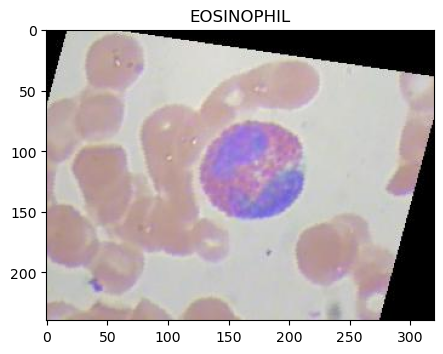

(240, 320, 3)


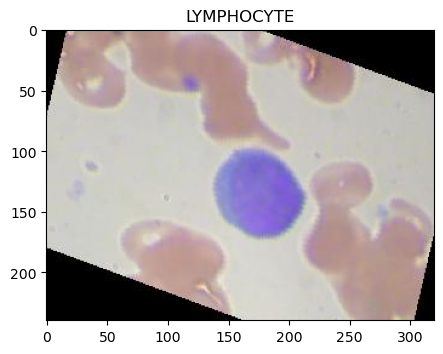

(240, 320, 3)


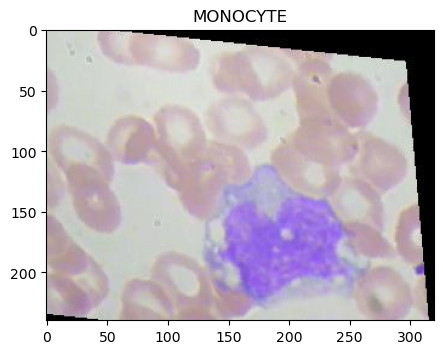

(240, 320, 3)


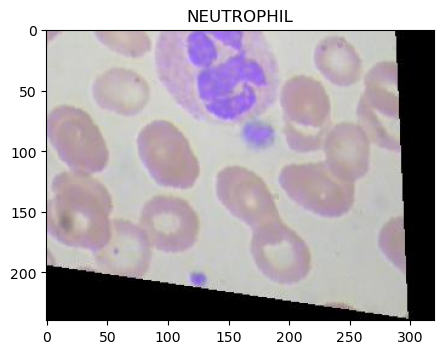

In [9]:
#reading original image from directory
# os.listdir() method in python is used to get the list of all files and directories in the specified directory.

for category in CATEGORIES:
        label=CATEGORIES.index(category)
       # print(label)
        path=os.path.join(train_dir,category) #eosinophil
        
        for img_file in os.listdir(path):  # first image, all images of eosinophil 0 to n subfolder
            
            # 1 indicates read image in BGR scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1) # loads an image from the specified file
                                                          #first image from the eosinophil
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img2=cv.cvtColor(img,cv.COLOR_BGR2RGB) #converting BGR to RGB

            print(img2.shape)

            plt.figure(figsize= (5,5))  # figure size 
            plt.title(category) # title
            plt.imshow(img2)
            plt.show()
            break
            
        #plotting single image from each folder

(60, 60, 3)


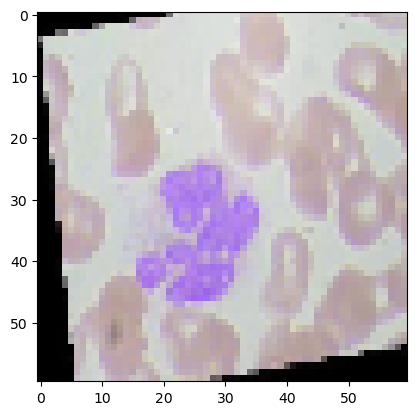

In [10]:
EOSINOPHIL = cv.imread("C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg")
EOSINOPHIL = cv.cvtColor(EOSINOPHIL,cv.COLOR_BGR2RGB)
image = cv.resize(EOSINOPHIL, (60,60))

plt.imshow(image)

print(image.shape)

(240, 320, 3)


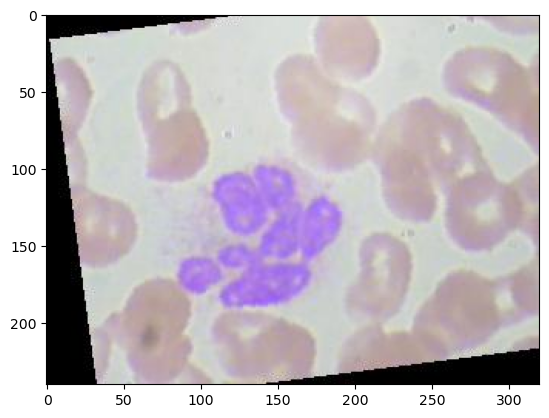

In [11]:
plt.imshow(EOSINOPHIL)
print(EOSINOPHIL.shape)

# Data Preparation 

In [12]:
#make train data
train_data=[]  # nested list

for category in CATEGORIES: # subtypes of WBC
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category) # target columns 
        path=os.path.join(train_dir,category)
        
        for img_file in os.listdir(path):
            #  image should be read in the color format
            img=cv.imread(os.path.join(path,img_file),1) # loads an image from the specified file
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB) # converting BGR to RGB
            img=cv.resize(img,(60,60))           # changing the size of the image  
            train_data.append([img,label])       # appending to list 

In [13]:
print('total number of images present in the train dataset :',len(train_data))

total number of images present in the train dataset : 9957


In [14]:
type(train_data)

list

In [15]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(test_dir,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [16]:
print('total number of images present in the test dataset :',len(test_data))

total number of images present in the test dataset : 2487


In [17]:
test_data[1:4]

[[array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [209, 215, 212],
          [213, 219, 215],
          [208, 214, 209]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [211, 219, 207],
          [213, 219, 214],
          [206, 211, 214]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [210, 218, 206],
          [212, 218, 213],
          [207, 212, 215]],
  
         ...,
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0

In [18]:
test_data[1][1]

0

In [19]:
#make test_sample data
test_samples = []

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(test_sample_dir,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(60,60))
            test_samples.append([img,label])

In [20]:
print('total number of images present in the test_sample dataset :',len(test_samples))

total number of images present in the test_sample dataset : 71


In [21]:
test_samples[1]

[array([[[199, 201, 200],
         [202, 203, 205],
         [202, 203, 207],
         ...,
         [193, 170, 192],
         [209, 191, 210],
         [223, 209, 227]],
 
        [[201, 204, 203],
         [201, 204, 205],
         [202, 205, 208],
         ...,
         [191, 158, 174],
         [190, 159, 181],
         [186, 157, 184]],
 
        [[198, 204, 202],
         [198, 204, 204],
         [200, 205, 208],
         ...,
         [196, 155, 162],
         [193, 154, 166],
         [191, 155, 172]],
 
        ...,
 
        [[192, 158, 156],
         [194, 160, 168],
         [190, 170, 172],
         ...,
         [212, 204, 208],
         [197, 178, 177],
         [193, 168, 167]],
 
        [[192, 163, 159],
         [191, 164, 170],
         [188, 180, 178],
         ...,
         [209, 193, 204],
         [208, 195, 197],
         [205, 190, 180]],
 
        [[188, 168, 161],
         [189, 174, 176],
         [206, 209, 204],
         ...,
         [212, 195, 212],
  

In [22]:
for lbl in train_data[:10]: # changing the position of the elements of the sequence
    print(lbl[1])

0
0
0
0
0
0
0
0
0
0


In [23]:
#shuffle the dataset for good result
# means changing the position of the elements of the sequence

import random

random.shuffle(train_data) # changing the order
random.shuffle(test_data)
random.shuffle(test_samples)

In [24]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])

2
2
2
1
0
0
0
3
1
0


In [25]:
##lets seprate the feature and target variable

train_X=[] # independent variales 
train_y=[] # dependent variables 

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [26]:
type(train_X)

list

In [27]:
#a = [1,2,3,4]

# Count of subtypes of WBC

In [28]:
print('total number of EOSINOPHIL Cell in train :',train_y.count(0))
print('total number of LYMPHOCYTE Cell in train :',train_y.count(1))
print('total number of MONOCYTE Cell in train   :',train_y.count(2))
print('total number of NEUTROPHIL Cell in train :',train_y.count(3))

total number of EOSINOPHIL Cell in train : 2497
total number of LYMPHOCYTE Cell in train : 2483
total number of MONOCYTE Cell in train   : 2478
total number of NEUTROPHIL Cell in train : 2499


In [29]:
#train_y.count(0), train_y.count(1), train_y.count(2), train_y.count(3)

In [30]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]
i = 0 

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

    

len(test_X),len(test_y)

(2487, 2487)

In [31]:
print('total number of EOSINOPHIL Cell in test :',test_y.count(0))
print('total number of LYMPHOCYTE Cell in test :',test_y.count(1))
print('total number of MONOCYTE Cell in test   :',test_y.count(2))
print('total number of NEUTROPHIL Cell in test :',test_y.count(3))

total number of EOSINOPHIL Cell in test : 623
total number of LYMPHOCYTE Cell in test : 620
total number of MONOCYTE Cell in test   : 620
total number of NEUTROPHIL Cell in test : 624


In [32]:
test_y[0:15]

[1, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 3, 2]

In [33]:
np.shape(test_X), np.shape(train_X)

((2487, 60, 60, 3), (9957, 60, 60, 3))

In [34]:
test_sample_X=[]
test_sample_y=[]
i = 0 

for features,label in test_samples:
    test_sample_X.append(features)
    test_sample_y.append(label)

    

len(test_sample_X),len(test_sample_y)

(71, 71)

In [35]:
print('total number of EOSINOPHIL Cell in test_sample :',test_sample_y.count(0))
print('total number of LYMPHOCYTE Cell in test_sample :',test_sample_y.count(1))
print('total number of MONOCYTE Cell in test_sample   :',test_sample_y.count(2))
print('total number of NEUTROPHIL Cell in test_sample :',test_sample_y.count(3))

total number of EOSINOPHIL Cell in test_sample : 13
total number of LYMPHOCYTE Cell in test_sample : 6
total number of MONOCYTE Cell in test_sample   : 4
total number of NEUTROPHIL Cell in test_sample : 48


In [36]:
type(train_X)

list

In [37]:
#convert image array to numpy array
#-1 means same size
# 60*60 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3) #-1 autocompleted the dimensions
train_X=train_X/255.0 #  models train faster mimmaxscaler (0to 1 )
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 60, 60, 3)

In [38]:
test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape


(2487, 60, 60, 3)

In [39]:
test_sample_X=np.array(test_sample_X).reshape(-1,60,60,3)
test_sample_X=test_sample_X/255.0
test_sample_X.shape

(71, 60, 60, 3)

In [40]:
type(train_X)

numpy.ndarray

In [41]:
#train_X[0]

<Axes: ylabel='count'>

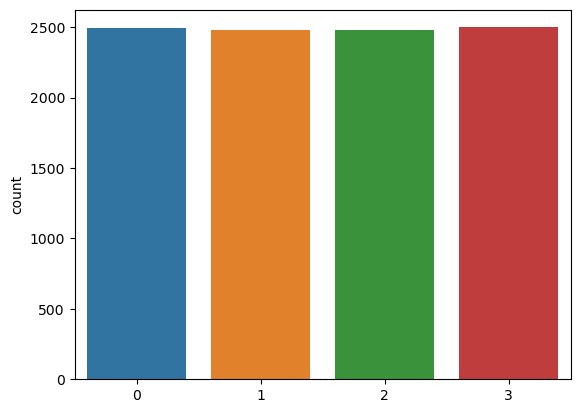

In [42]:
#count labels for train

sns.countplot(x = train_y )
#we can see each categroy has equal data 

<Axes: ylabel='count'>

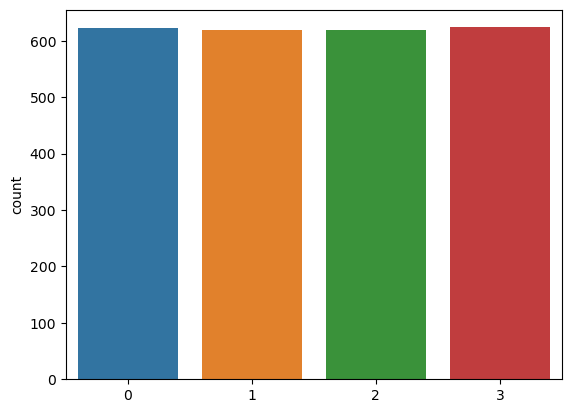

In [43]:
# count plot for test

sns.countplot(x = test_y)


<Axes: ylabel='count'>

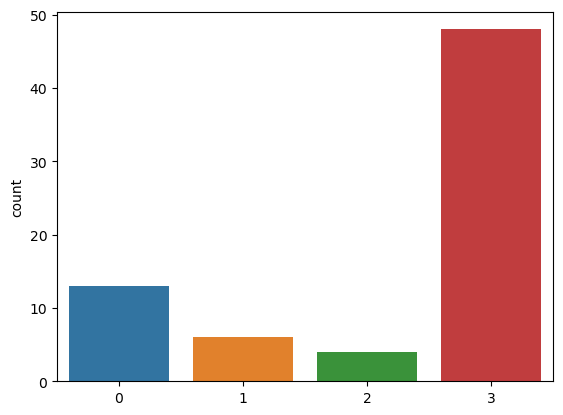

In [44]:
# count plot for test sample

sns.countplot(x =test_sample_y)


train_y

In [46]:
#convert label into the one hot encode
from keras.utils import to_categorical
#train y
one_hot_train = to_categorical(train_y) #Converts a class vector (integers) to binary class matrix.

one_hot_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [47]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [48]:
#test_sample_y
one_hot_test_sample=to_categorical(test_sample_y)
#one_hot_test_sample

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

# Model Building

In [50]:
model=Sequential()

model.add(Conv2D(filters= 32,kernel_size = (3,3),activation ='relu',input_shape=(60,60,3))) # first Convolution block
model.add(MaxPooling2D(pool_size=(2,2))) #  reduce the dimensions of the feature maps.
model.add(Dropout(0.20)) # helps prevent overfitting

model.add(Conv2D(64,(3,3),activation='relu')) # second Convolution block
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu')) # # Third Convolution block
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten()) # flatten layer

model.add(Dense(64,activation='relu')) # first fully connected layer
model.add(Dense(128,activation='relu')) # second FCl
model.add(Dense(64,activation='relu')) # third FCL
          
model.add(Dense(4,activation='softmax')) # Output Layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0

# parameter calculation

In [49]:
3*3*32*3 + 32, 3*3*64*32+64, 3*3*128*64+128, 5*5*128 , 3200*64+64,  64*128+128, 128*64+64, 64*4+4

(896, 18496, 73856, 3200, 204864, 8320, 8256, 260)

# image sizes

In [50]:
60-3+1, 58/2, 29-3+1, 13-3+1

(58, 29.0, 27, 11)

In [51]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [52]:
#lets split the 20% train dataset for validation 
# batch_size: Integer or None. Number of samples per gradient update.
# An epoch is an iteration over the entire x and y data provided

hist =model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 64s 859ms/step - loss: 1.3876 - accuracy: 0.2599 - val_loss: 1.3844 - val_accuracy: 0.3273
Epoch 2/50
63/63 [==============================] - 50s 789ms/step - loss: 1.3485 - accuracy: 0.3299 - val_loss: 1.2951 - val_accuracy: 0.3619
Epoch 3/50
63/63 [==============================] - 50s 789ms/step - loss: 1.2182 - accuracy: 0.4207 - val_loss: 1.1806 - val_accuracy: 0.4252
Epoch 4/50
63/63 [==============================] - 47s 740ms/step - loss: 1.0982 - accuracy: 0.5068 - val_loss: 1.0039 - val_accuracy: 0.5748
Epoch 5/50
63/63 [==============================] - 43s 677ms/step - loss: 0.8923 - accuracy: 0.6051 - val_loss: 0.8350 - val_accuracy: 0.6170
Epoch 6/50
63/63 [==============================] - 44s 705ms/step - loss: 0.7480 - accuracy: 0.6657 - val_loss: 0.7044 - val_accuracy: 0.6747
Epoch 7/50
63/63 [==============================] - 44s 700ms/step - loss: 0.7254 - accuracy: 0.6819 - val_loss: 0.6279 - val_accuracy: 0.7696

In [53]:
model.save("cnn_27.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
9957*0.2

1991.4

In [55]:
9957*0.2-9957

-7965.6

In [56]:
9957, 7965.6

(9957, 7965.6)

In [57]:
7965.6/128

62.23125

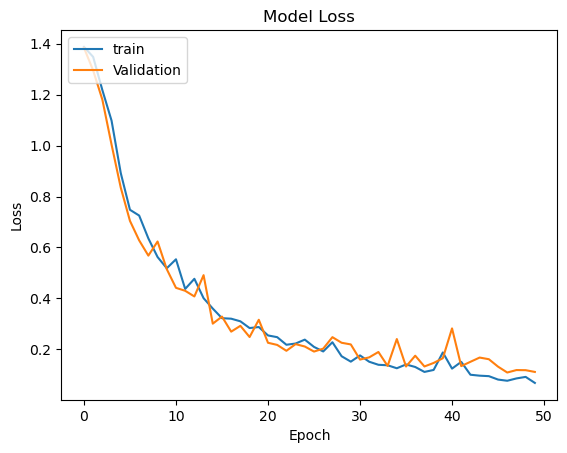

In [58]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

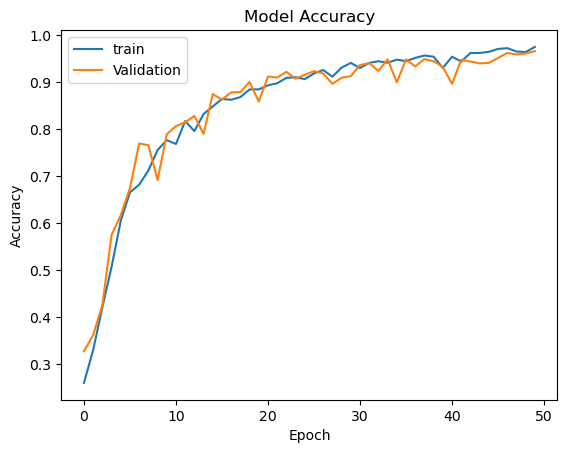

In [59]:
#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [52]:
# save the model
from tensorflow.keras.models import load_model
 
# load model
model = load_model('cnn_27.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0

In [53]:
#model evaluation on test
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

78/78 [==============================] - 2s 22ms/step - loss: 0.5952 - accuracy: 0.8267


(0.595181941986084, 0.8266988396644592)

In [54]:
#model evaluation  on test sample
test_sample_loss,test_sample_acc=model.evaluate(test_sample_X,one_hot_test_sample)
test_sample_loss,test_sample_acc

3/3 [==============================] - 0s 21ms/step - loss: 0.2825 - accuracy: 0.8592


(0.2824843227863312, 0.8591549396514893)

# model prediction

In [55]:
#model prediction on train

y_pred_train=model.predict(train_X)
print(y_pred_train)

y_pred_train=np.argmax(y_pred_train,axis=1)
print(y_pred_train)

312/312 [==============================] - 6s 20ms/step
[[1.1793614e-05 3.5834211e-04 9.9960858e-01 2.1364785e-05]
 [4.6234711e-10 1.9667338e-08 1.0000000e+00 2.4327784e-08]
 [9.8005382e-09 2.1056819e-07 9.9999976e-01 1.0305118e-08]
 ...
 [1.0837542e-09 1.1092553e-06 9.9999893e-01 2.3360451e-09]
 [5.1052602e-06 1.1327585e-03 9.9885023e-01 1.1871161e-05]
 [1.0000000e+00 1.3364368e-18 1.3998826e-21 1.4402047e-13]]
[2 2 2 ... 2 2 0]


In [56]:
#model prediction on test

y_pred_test=model.predict(test_X)

y_pred_test=np.argmax(y_pred_test,axis=1)
y_pred_test

78/78 [==============================] - 1s 19ms/step


array([1, 3, 0, ..., 0, 0, 3], dtype=int64)

In [57]:
y_pred_test_sample=model.predict(test_sample_X)

y_pred_test_sample=np.argmax(y_pred_test_sample,axis=1)
y_pred_test_sample

3/3 [==============================] - 0s 14ms/step


array([3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3,
       0, 0, 1, 1, 3, 3, 0, 3, 3, 3, 1, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 1,
       2, 3, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 3, 1, 2, 0, 3, 3,
       3, 1, 3, 3, 0], dtype=int64)

In [58]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred_test[i]))

Actual=1, Predicted=1
Actual=3, Predicted=3
Actual=0, Predicted=0
Actual=2, Predicted=2
Actual=0, Predicted=0
Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=1, Predicted=1
Actual=3, Predicted=3


In [59]:
len(test_sample_y)

71

for i in range(71):
	print("Actual=%s, Predicted=%s" % (test_sample_y[i],y_pred_test_sample[i]))

In [61]:
10 

10

In [87]:
71-71*85.91/100

10.003900000000002

In [88]:
2487-2487*82.66/100

431.24580000000014

In [90]:
9957-9957*98.95/100

104.54849999999897

# accuracy_score

In [67]:
# train accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

accuracy_score(train_y,y_pred_train)

0.9895550868735563

In [68]:
# test accuracy_score
accuracy_score(test_y,y_pred_test)

0.8266988339364696

In [69]:
# test_sample accuracy_score

accuracy_score(test_sample_y,y_pred_test_sample)

0.8591549295774648

# confusion_matrix

In [70]:
# confusion_matrix on train

cm1 = confusion_matrix(train_y,y_pred_train)
cm1

array([[2429,    2,    3,   63],
       [   1, 2473,    2,    7],
       [   1,    2, 2475,    0],
       [  20,    0,    3, 2476]], dtype=int64)

In [71]:
# confusion_matrix on test 

cm2 = confusion_matrix(test_y,y_pred_test)
cm2

array([[448,   1,   5, 169],
       [  2, 597,  11,  10],
       [ 24,   5, 486, 105],
       [ 82,   3,  14, 525]], dtype=int64)

In [72]:
# confusion_matrix on test_sample

cm3 = confusion_matrix(test_sample_y,y_pred_test_sample)
cm3

array([[11,  0,  0,  2],
       [ 0,  6,  0,  0],
       [ 0,  0,  3,  1],
       [ 5,  0,  2, 41]], dtype=int64)

# classification_report

In [73]:
#classification_report on train

print(classification_report(train_y,y_pred_train,
                           target_names = ['EOSINOPHIL (Class 0)', 'LYMPHOCYTE (Class 1)', 'MONOCYTE (Class 2)', 'NEUTROPHIL (Class 3)']))

                      precision    recall  f1-score   support

EOSINOPHIL (Class 0)       0.99      0.97      0.98      2497
LYMPHOCYTE (Class 1)       1.00      1.00      1.00      2483
  MONOCYTE (Class 2)       1.00      1.00      1.00      2478
NEUTROPHIL (Class 3)       0.97      0.99      0.98      2499

            accuracy                           0.99      9957
           macro avg       0.99      0.99      0.99      9957
        weighted avg       0.99      0.99      0.99      9957



In [74]:
#classification_report on test

print(classification_report(test_y,y_pred_test,
                           target_names = ['EOSINOPHIL (Class 0)', 'LYMPHOCYTE (Class 1)', 'MONOCYTE (Class 2)', 'NEUTROPHIL (Class 3)']))

                      precision    recall  f1-score   support

EOSINOPHIL (Class 0)       0.81      0.72      0.76       623
LYMPHOCYTE (Class 1)       0.99      0.96      0.97       620
  MONOCYTE (Class 2)       0.94      0.78      0.86       620
NEUTROPHIL (Class 3)       0.65      0.84      0.73       624

            accuracy                           0.83      2487
           macro avg       0.85      0.83      0.83      2487
        weighted avg       0.85      0.83      0.83      2487



In [75]:
#classification_report on test_sample

print(classification_report(test_sample_y,y_pred_test_sample,
                           target_names = ['EOSINOPHIL (Class 0)', 'LYMPHOCYTE (Class 1)', 'MONOCYTE (Class 2)', 'NEUTROPHIL (Class 3)']))

                      precision    recall  f1-score   support

EOSINOPHIL (Class 0)       0.69      0.85      0.76        13
LYMPHOCYTE (Class 1)       1.00      1.00      1.00         6
  MONOCYTE (Class 2)       0.60      0.75      0.67         4
NEUTROPHIL (Class 3)       0.93      0.85      0.89        48

            accuracy                           0.86        71
           macro avg       0.80      0.86      0.83        71
        weighted avg       0.87      0.86      0.86        71



In [76]:
CLASS_NAMES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

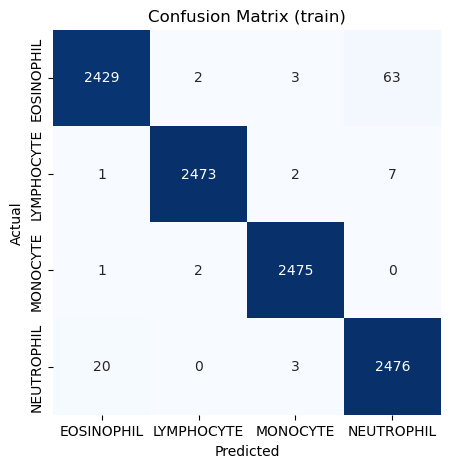

In [77]:
# train

plt.figure(figsize=(5, 5))
sns.heatmap(cm1, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4)+ 0.5 , labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) +0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (train)")
plt.show()

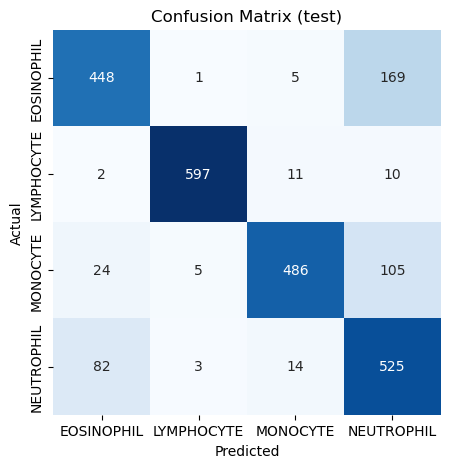

In [78]:
# test

plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4)+ 0.5 , labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) +0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (test)")
plt.show()

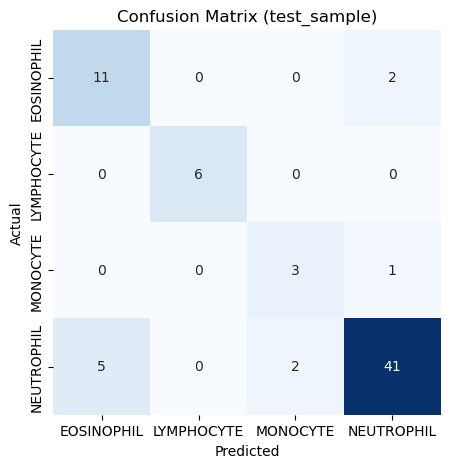

In [79]:
# test sample

plt.figure(figsize=(5, 5))
sns.heatmap(cm3, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4)+ 0.5 , labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) +0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (test_sample)")
plt.show()

# Prediction 

In [100]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_5_1744.jpeg"
file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_7_2284.jpeg"


img = image.load_img(file, target_size=(60, 60))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255


prediction_prob = np.argmax(model.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 28ms/step
0
EOSINOPHIL


In [ ]:
"C:\Users\pramod\Desktop\CV\INTERNSHIP\dataset2-master\dataset2-master\images\TRAIN\EOSINOPHIL\_0_207.jpeg"

In [83]:
img.shape

(1, 60, 60, 3)

In [105]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/_3_7545.jpeg"
file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/_5_1558.jpeg"

img = image.load_img(file, target_size=(60, 60))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255


prediction_prob = np.argmax(model.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 20ms/step
1
LYMPHOCYTE


In [110]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image


file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/_2_6981.jpeg"
file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/_1_4511.jpeg"


img = image.load_img(file, target_size=(60, 60))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255


prediction_prob = np.argmax(model.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 23ms/step
2
MONOCYTE


In [116]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_12_9974.jpeg"
file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_17_9949.jpeg"
img = image.load_img(file, target_size=(60, 60))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255


prediction_prob = np.argmax(model.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 24ms/step
3
NEUTROPHIL


link :(https://www.youtube.com/watch?v=NtNl97LlpOk&t=45s)
link : (https://www.youtube.com/watch?v=0nr6TPKlrN0&t=10s)